# K-Means contraint

Les [k-means](https://en.wikipedia.org/wiki/K-means_clustering) construisent des clusters qui ne sont pas forcément équilibrés. Comment modifier l'algorithme original pour que ce soit le cas ?

## A random simple dataset

In [1]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, 
                  center_box=(-10.0, 0.0), shuffle=True, random_state=None)
X1 = data[0]
data = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.0, 
                  center_box=(0.0, 10.0), shuffle=True, random_state=None)
X2 = data[0]

import numpy
X = numpy.vstack([X1, X2])
X.shape

(150, 2)

In [2]:
%matplotlib inline

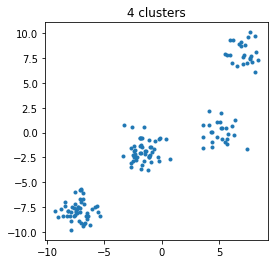

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(X[:, 0], X[:, 1], '.')
ax.set_title('4 clusters');

## k-means classique

Le modèles des [k-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) classique.

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(X)
cl = km.predict(X)

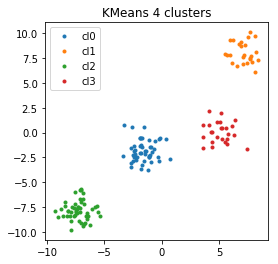

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in range(0, max(cl)+1):
    ax.plot(X[cl == i, 0], X[cl == i, 1], '.', label='cl%d' % i)
ax.set_title('KMeans 4 clusters')
ax.legend();

## k-means contraint - sortby=distance

Et maintenant la version où chaque cluster contient approximativement le même nombre de points.

In [6]:
from papierstat.mltricks import ConstraintKMeans
km = ConstraintKMeans(n_clusters=4, balanced_predictions=True)
km.fit(X)
cl = km.predict(X)

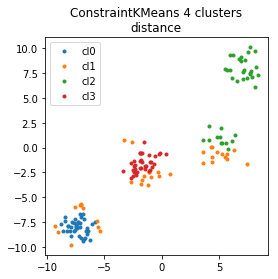

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in range(0, max(cl)+1):
    ax.plot(X[cl == i, 0], X[cl == i, 1], '.', label='cl%d' % i)
ax.set_title('ConstraintKMeans 4 clusters\ndistance')
ax.legend();

En affectant d'abord les points proches du centre le plus proche, les points les plus éloignés sont traités en dernier et affectés à ce qui reste. Les clusters construits ne sont plus convexes.

## k-means contraint - sortby=-distance

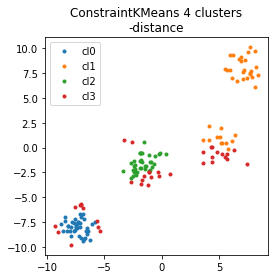

In [8]:
from papierstat.mltricks import ConstraintKMeans
km = ConstraintKMeans(n_clusters=4, balanced_predictions=True, sortby='-distance')
km.fit(X)
cl = km.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in range(0, max(cl)+1):
    ax.plot(X[cl == i, 0], X[cl == i, 1], '.', label='cl%d' % i)
ax.set_title('ConstraintKMeans 4 clusters\n-distance')
ax.legend();

## k-means contraint - sortby=ratio

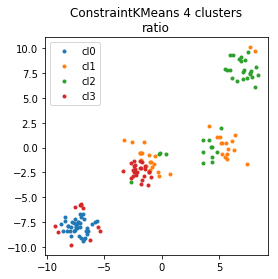

In [9]:
from papierstat.mltricks import ConstraintKMeans
km = ConstraintKMeans(n_clusters=4, balanced_predictions=True, sortby='ratio')
km.fit(X)
cl = km.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in range(0, max(cl)+1):
    ax.plot(X[cl == i, 0], X[cl == i, 1], '.', label='cl%d' % i)
ax.set_title('ConstraintKMeans 4 clusters\nratio')
ax.legend();

## k-means contraint - sortby=-ratio

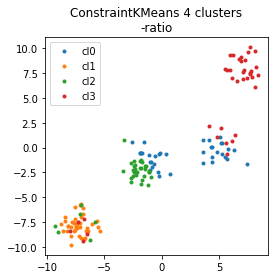

In [10]:
from papierstat.mltricks import ConstraintKMeans
km = ConstraintKMeans(n_clusters=4, balanced_predictions=True, sortby='-ratio')
km.fit(X)
cl = km.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in range(0, max(cl)+1):
    ax.plot(X[cl == i, 0], X[cl == i, 1], '.', label='cl%d' % i)
ax.set_title('ConstraintKMeans 4 clusters\n-ratio')
ax.legend();